In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [4]:
titanic_data = pd.read_csv('titanic/train.csv')

In [5]:
print(titanic_data)
titanic_data.head()

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.shape

(891, 12)

In [7]:
# Display basic information about the DataFrame
print(titanic_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
# Display summary statistics for numerical columns
print(titanic_data.describe())



       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:
# Display the first few rows of the DataFrame
print(titanic_data.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [10]:
# Assuming your DataFrame is named 'df'
# Move 'Survived' column to the last position
titanic_data = titanic_data[[col for col in titanic_data.columns if col != 'Survived'] + ['Survived']]
print(titanic_data)

     PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
..           ...     ...                                                ...   
886          887       2                              Montvila, Rev. Juozas   
887          888       1                       Graham, Miss. Margaret Edith   
888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
889          890       1                              Behr, Mr. Karl Howell   
890          891       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket  

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

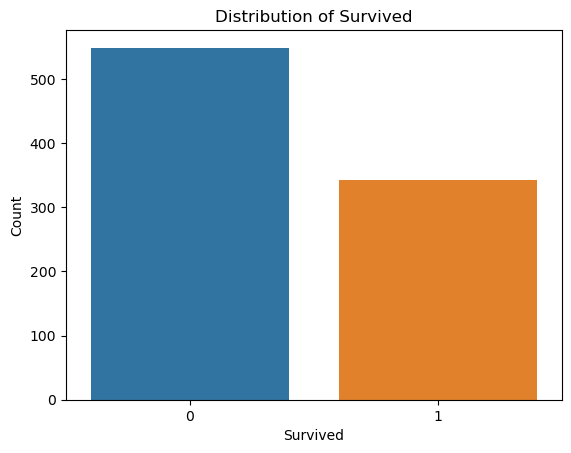

In [12]:
sns.countplot(x='Survived', data=titanic_data)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of Survived')
plt.show()

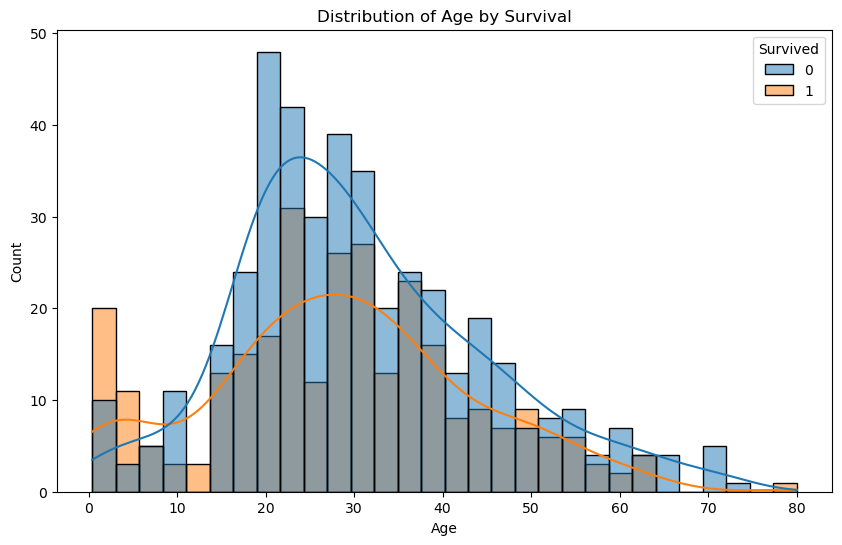

In [13]:
# Assuming 'Age' is a numerical feature
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Survived', data=titanic_data, bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Survival')
plt.show()

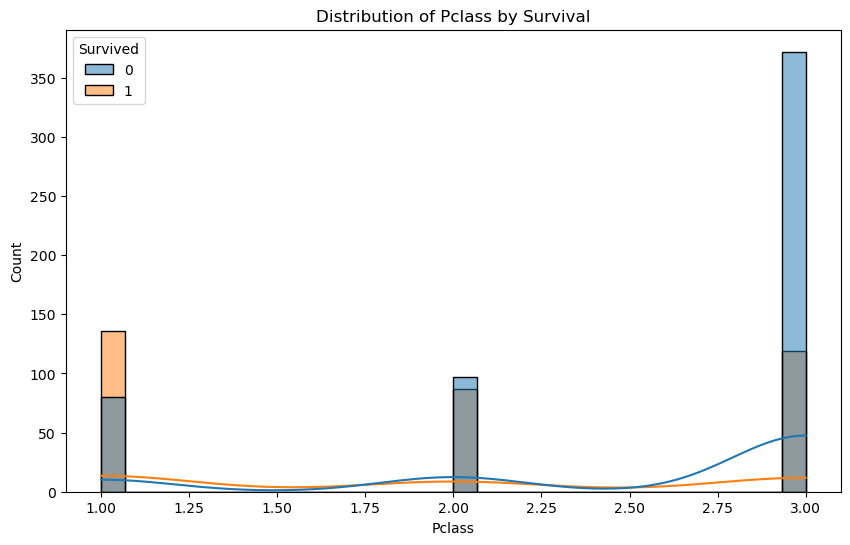

In [14]:
# Assuming 'Age' is a numerical feature
plt.figure(figsize=(10, 6))
sns.histplot(x='Pclass', hue='Survived', data=titanic_data, bins=30, kde=True)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Distribution of Pclass by Survival')
plt.show()

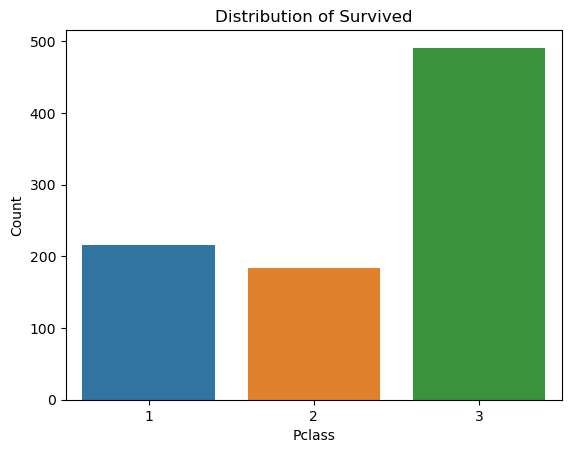

In [15]:
sns.countplot(x='Pclass', data=titanic_data)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Distribution of Survived')
plt.show()

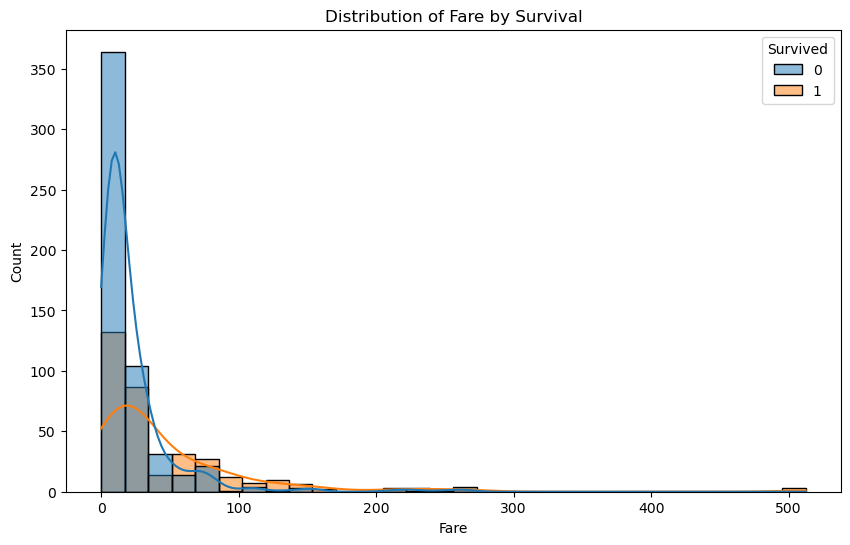

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Fare', hue='Survived', data=titanic_data, bins=30, kde=True)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fare by Survival')
plt.show()

C:\Users\l2151\AppData\Local\Temp\ipykernel_6056\1251796658.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_data.corr()


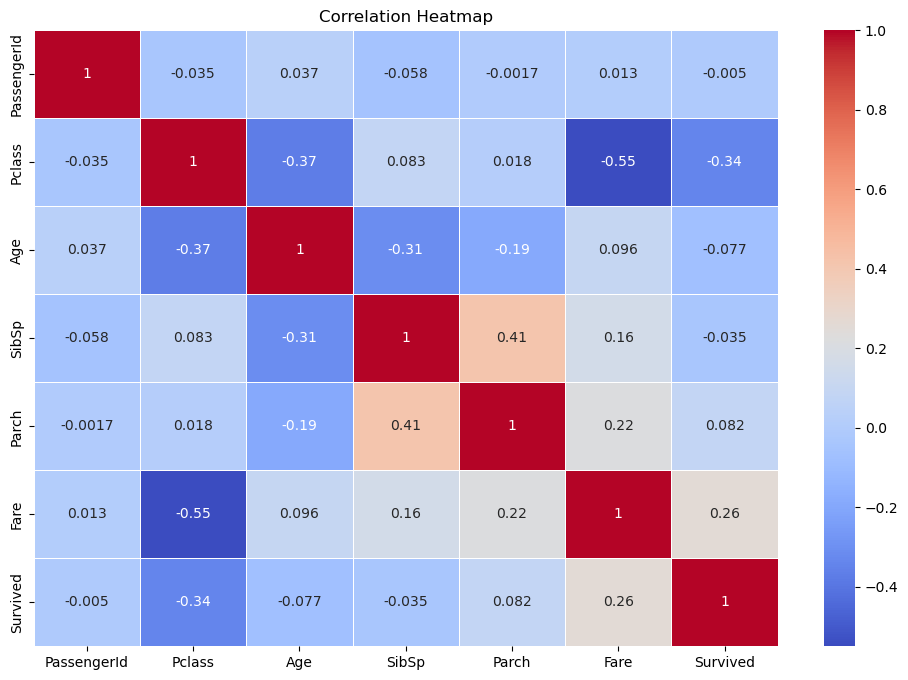

In [17]:
plt.figure(figsize=(12, 8))
correlation_matrix = titanic_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

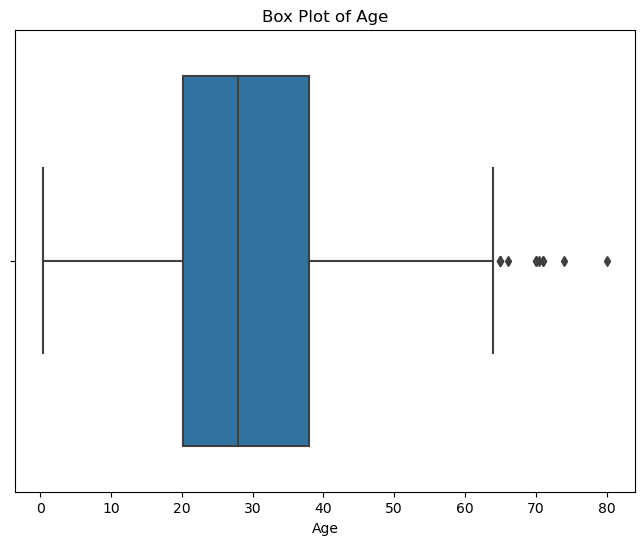

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=titanic_data)
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

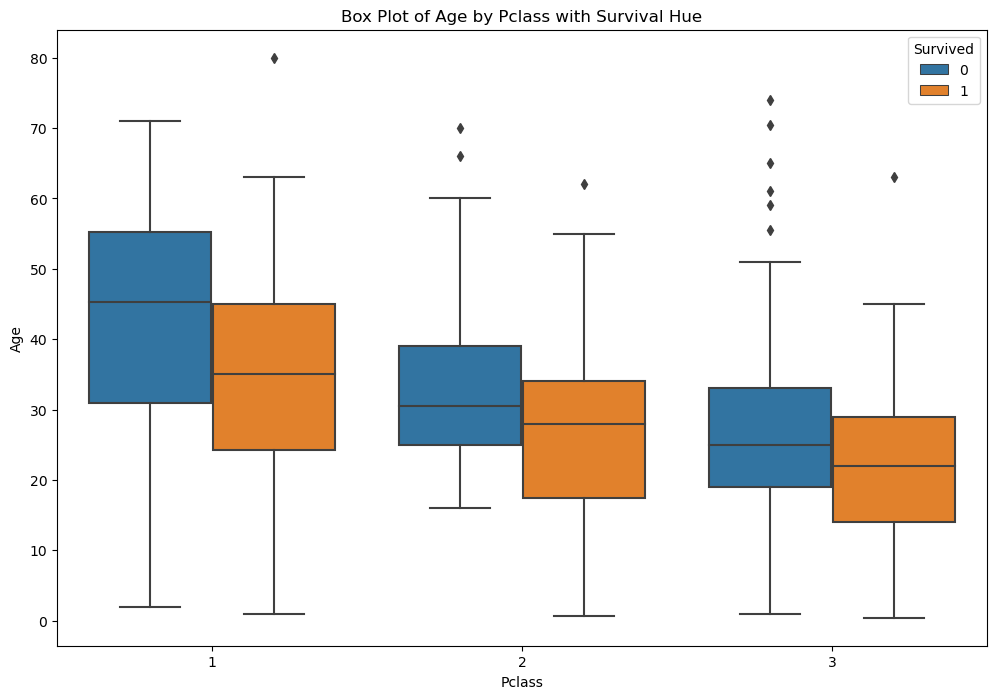

In [19]:
# Assuming 'titanic_data' is your DataFrame
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=titanic_data)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Box Plot of Age by Pclass with Survival Hue')
plt.show()

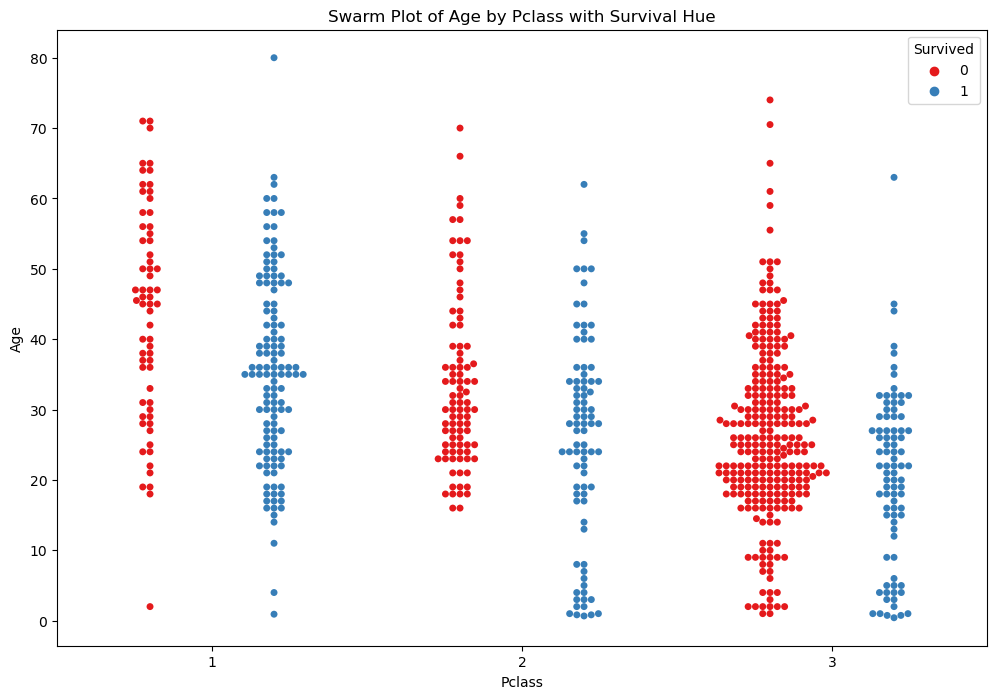

In [20]:
# Assuming 'titanic_data' is your DataFrame
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', data=titanic_data, dodge=True, palette='Set1', hue_order=[0, 1])
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Swarm Plot of Age by Pclass with Survival Hue')
plt.show()

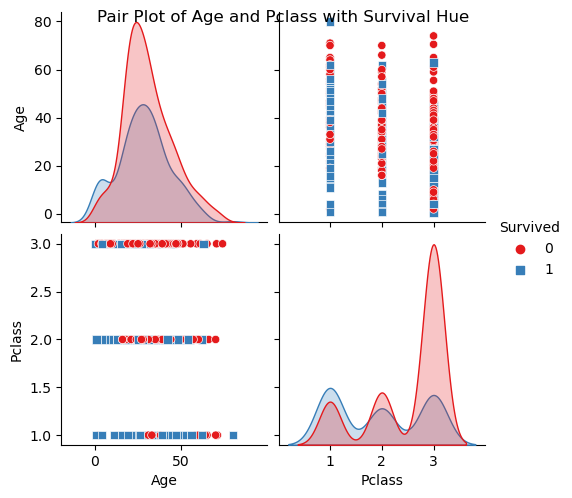

In [21]:
sns.pairplot(titanic_data, hue='Survived', vars=['Age', 'Pclass'], markers=["o", "s"], palette='Set1')
plt.suptitle('Pair Plot of Age and Pclass with Survival Hue')
plt.show()

In [22]:
titanic_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [23]:
# Assuming your DataFrame is named 'df' and you want to drop columns 'Column1', 'Column2', and 'Column3'
columns_to_drop = ['Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

# Drop the specified columns
titanic_data.drop(columns=columns_to_drop, inplace=True)

In [24]:
null_values = titanic_data[['Pclass', 'Sex', 'Age']].isnull()

# Display the count of null values in each column
print("Null values in 'Pclass', 'Sex', and 'Age':")
print(null_values.sum())

Null values in 'Pclass', 'Sex', and 'Age':
Pclass      0
Sex         0
Age       177
dtype: int64


In [25]:
# Calculate the IQR (Interquartile Range) for the 'Age' column
Q1 = titanic_data['Age'].quantile(0.25)
Q3 = titanic_data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and filter out rows with age values outside the bounds
titanic_data_no_outliers = titanic_data[(titanic_data['Age'] >= lower_bound) & (titanic_data['Age'] <= upper_bound)]

# Check the shape of the DataFrame before and after removing outliers
print("Shape before removing outliers:", titanic_data.shape)
print("Shape after removing outliers in 'Age':", titanic_data_no_outliers.shape)

Shape before removing outliers: (891, 5)
Shape after removing outliers in 'Age': (703, 5)


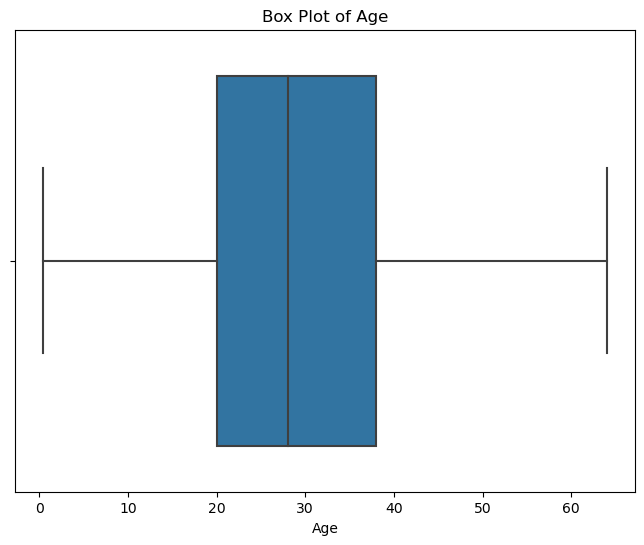

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=titanic_data_no_outliers)
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

In [27]:
# Assuming 'df' is your DataFrame
features_no_outliers= titanic_data_no_outliers[['Pclass', 'Sex', 'Age']]
target_no_outliers = titanic_data_no_outliers['Survived']
features=titanic_data[['Pclass', 'Sex', 'Age']]
target=titanic_data['Survived']


In [28]:
#one hotnencoding here
features = pd.get_dummies(features, columns=['Sex'], drop_first=True)
features_no_outliers=pd.get_dummies(features_no_outliers, columns=['Sex'], drop_first=True)
# Handle missing values in 'Age' (e.g., fill with the mean)
features['Age'].fillna(features['Age'].mean(), inplace=True)
features_no_outliers['Age'].fillna(features_no_outliers['Age'].mean(), inplace=True)

In [29]:
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(features, target, test_size=0.2, random_state=42)

# Choose a machine learning model
model1 = RandomForestClassifier(random_state=42)

# Train the model
model1.fit(X_train1, y_train1)

# Make predictions on the validation set
predictions1 = model1.predict(X_valid1)
print(predictions1)
# Evaluate the model
accuracy1 = accuracy_score(y_valid1, predictions1)
print(f'Accuracy on validation set: {accuracy1}')

[0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1]
Accuracy on validation set: 0.7932960893854749


In [30]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

In [32]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train1, y_train1)

    # Make predictions on the validation set
    predictions = model.predict(X_valid1)

    # Evaluate the model
    accuracy = accuracy_score(y_valid1, predictions)
    print(f'{model_name} Accuracy: {accuracy}')

Random Forest Accuracy: 0.7932960893854749
Logistic Regression Accuracy: 0.8100558659217877
Support Vector Machine Accuracy: 0.6089385474860335


In [33]:
# Define hyperparameter grids for each model
param_grid = {
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10]},
    'Support Vector Machine': {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train1, y_train1)

    # Print the best hyperparameters for each model
    print(f'Best hyperparameters for {model_name}: {grid_search.best_params_}')

    # Make predictions on the validation set using the best model
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_valid1)

    # Evaluate the best model
    accuracy = accuracy_score(y_valid1, predictions)
    print(f'Best {model_name} Accuracy: {accuracy}')

Best hyperparameters for Random Forest: {'max_depth': 10, 'n_estimators': 10}
Best Random Forest Accuracy: 0.7932960893854749
Best hyperparameters for Logistic Regression: {'C': 1}
Best Logistic Regression Accuracy: 0.8100558659217877
Best hyperparameters for Support Vector Machine: {'C': 10, 'kernel': 'rbf'}
Best Support Vector Machine Accuracy: 0.776536312849162


In [34]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(features_no_outliers, target_no_outliers, test_size=0.2, random_state=42)

# Choose a machine learning model
model2 = RandomForestClassifier(random_state=42)

# Train the model
model2.fit(X_train2, y_train2)

# Make predictions on the validation set
predictions2 = model2.predict(X_valid2)
print(predictions2)
# Evaluate the model
accuracy2 = accuracy_score(y_valid2, predictions2)
print(f'Accuracy on validation set: {accuracy2}')

[0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1
 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1]
Accuracy on validation set: 0.7801418439716312


In [35]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train2, y_train2)

    # Make predictions on the validation set
    predictions = model.predict(X_valid2)

    # Evaluate the model
    accuracy = accuracy_score(y_valid2, predictions)
    print(f'{model_name} Accuracy: {accuracy}')
    

Random Forest Accuracy: 0.7801418439716312
Logistic Regression Accuracy: 0.7872340425531915
Support Vector Machine Accuracy: 0.5886524822695035


In [36]:
param_grid = {
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10]},
    'Support Vector Machine': {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train2, y_train2)

    # Print the best hyperparameters for each model
    print(f'Best hyperparameters for {model_name}: {grid_search.best_params_}')

    # Make predictions on the validation set using the best model
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_valid2)

    # Evaluate the best model
    accuracy = accuracy_score(y_valid2, predictions)
    print(f'Best {model_name} Accuracy: {accuracy}')

Best hyperparameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Best Random Forest Accuracy: 0.7801418439716312
Best hyperparameters for Logistic Regression: {'C': 0.1}
Best Logistic Regression Accuracy: 0.7730496453900709
Best hyperparameters for Support Vector Machine: {'C': 10, 'kernel': 'rbf'}
Best Support Vector Machine Accuracy: 0.7801418439716312


NOW FOR TEST DATA


In [46]:
titanic_data = pd.read_csv('titanic/test.csv')

In [47]:
print(titanic_data)
titanic_data.head()

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [49]:
columns_to_drop = ['Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

# Drop the specified columns
titanic_data.drop(columns=columns_to_drop, inplace=True)

In [50]:

features=titanic_data[['Pclass', 'Sex', 'Age']]

In [51]:
features = pd.get_dummies(features, columns=['Sex'], drop_first=True)
# Handle missing values in 'Age' (e.g., fill with the mean)
features['Age'].fillna(features['Age'].mean(), inplace=True)

Deciding the best model above train the model then predict

In [52]:
# Best hyperparameters for Logistic Regression
best_logreg_params = {'C': 1}

# Train Logistic Regression with the best hyperparameters using the entire training dataset
best_logreg_model = LogisticRegression(**best_logreg_params)
best_logreg_model.fit(X_train1, y_train1)

# Make predictions on the validation set (or any new data)
predictions = best_logreg_model.predict(X_valid1)

# Evaluate the best model
accuracy = accuracy_score(y_valid1, predictions)
print(f'Best Logistic Regression Accuracy: {accuracy}')

Best Logistic Regression Accuracy: 0.8100558659217877


In [53]:
predictions = best_logreg_model.predict(features)

In [55]:
passenger_ids = titanic_data['PassengerId']

# Create a DataFrame with 'PassengerId' and 'Survived' columns
output_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})

# Save the DataFrame to a CSV file
output_df.to_csv('prediction_results.csv', index=False)